In [1]:
!pip install opencv-python

In [2]:
import numpy as np
import scipy.linalg as sla
from PIL import Image
from scipy import misc
import scipy.sparse as sps
import scipy.sparse.linalg as spla
import timeit
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pandas as pd

from tqdm.auto import tqdm

## Напишем функцию для сбора данных

In [76]:
def prepare_photo_aug2(df, dir):
    """INPUT
    df -> pandas DataFrame: empty df
    dir -> str: abs path to dir with photo
        
        OTPUT -> pandas:DataFrame: full df"""
        
    path = '/content/drive/MyDrive/НИС'+f'/{dir}'
    photos = os.listdir(path)
    print(len(photos))

    for i, photo in enumerate(tqdm(photos)):
        try:
            photo_pth = f'{path}/'+f'{photo}'
            img = 255 - cv2.imread(photo_pth, cv2.IMREAD_GRAYSCALE) # это матрица из интенсивностей серого цвета

            width = 224
            height = 224
            dim = (width, height)

            # resize image
            #resized = cv2.resize(img, dim, interpolation = cv2.INTER_LANCZOS4)
            data0 = np.reshape(img, 50176)
            data0 = pd.Series(data0)
            df = df.append(data0, ignore_index=True)
            
            '''
            center = (width/2, height/2)
            
            # добавим 90
            m = cv2.getRotationMatrix2D(center, 90, 1.0)
            rotated = cv2.warpAffine(img, m, dim)
            
            data = np.reshape(rotated, 50176)
            data = pd.Series(data)
            df = df.append(data, ignore_index=True)
            
            # добавим 180
            m2 = cv2.getRotationMatrix2D(center, 180, 1.0)
            rotated2 = cv2.warpAffine(img, m2, dim)
            data2 = np.reshape(rotated2, 50176)
            data2 = pd.Series(data2)
            df = df.append(data2, ignore_index=True)
            
            # добавим 270
            m3 = cv2.getRotationMatrix2D(center, 270, 1.0)
            rotated3 = cv2.warpAffine(img, m3, dim)      
            data3 = np.reshape(rotated3, 50176)
            data3 = pd.Series(data3)
            df = df.append(data3, ignore_index=True)
                                                    '''
        except:
            print(f'ALARM error with {i, photo}')
    return df

In [77]:
df_z = pd.DataFrame(columns=[i for i in range(50176)])

## Соберем табличные данные

In [79]:
p1 = '1_предупреждающие'  #predupr
p2 = '2_приоритета'       #prior
p3 = '3_запрещающие'      #zapret
p4 = '4_предписывающие'   #predpis
p5 = '5_особых предписаний'#os_predpis
p6 = '6_информационные'   #info
p7 = '7_сервиса'          #service
p8 = '8_доп информации(таблички)'#tables

In [80]:
df1 = prepare_photo_aug2(df_z, p1)

84


  0%|          | 0/84 [00:00<?, ?it/s]

In [82]:
df2 = prepare_photo_aug2(df_z, p2)

35


  0%|          | 0/35 [00:00<?, ?it/s]

In [83]:
df3 = prepare_photo_aug2(df_z, p3)

124


  0%|          | 0/124 [00:00<?, ?it/s]

In [84]:
df4 = prepare_photo_aug2(df_z, p4)

37


  0%|          | 0/37 [00:00<?, ?it/s]

In [85]:
df5 = prepare_photo_aug2(df_z, p5)

152


  0%|          | 0/152 [00:00<?, ?it/s]

In [87]:
df6 = prepare_photo_aug2(df_z, p6)

81


  0%|          | 0/81 [00:00<?, ?it/s]

In [88]:
df7 = prepare_photo_aug2(df_z, p7)

28


  0%|          | 0/28 [00:00<?, ?it/s]

In [89]:
df8 = prepare_photo_aug2(df_z, p8)

148


  0%|          | 0/148 [00:00<?, ?it/s]

## Промаркируем данные и соберем датасет

In [91]:
df1['target'] = 'predupr'
df2['target'] = 'prior'
df3['target'] = 'zapret'
df4['target'] = 'predpis'
df5['target'] = 'os_predpis'
df6['target'] = 'info'
df7['target'] = 'service'
df8['target'] = 'tables'

In [92]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], axis=0, ignore_index=True)

In [94]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,50167,50168,50169,50170,50171,50172,50173,50174,50175,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,predupr
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,predupr


## Подготовим выборку для обучения модели

In [107]:
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix

In [95]:
# Закодируем лейблы
LE = LabelEncoder()

In [97]:
df.target = LE.fit_transform(df.target)

In [102]:
# Разделим выборку
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.target, test_size=0.3, random_state=42)

## Обучим модель

In [103]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 51 kB/s 


In [104]:
from catboost import CatBoostClassifier

In [105]:
clf = CatBoostClassifier(loss_function='MultiClass',depth = 3,\
                                                iterations = 180,\
                                                l2_leaf_reg = 1,\
                                                learning_rate = 0.25075)

clf.fit(x_train, y_train)

0:	learn: 1.7269530	total: 10.9s	remaining: 32m 37s
1:	learn: 1.5962072	total: 17s	remaining: 25m 14s
2:	learn: 1.4651336	total: 23.2s	remaining: 22m 50s
3:	learn: 1.3535001	total: 29.5s	remaining: 21m 37s
4:	learn: 1.2932503	total: 35.7s	remaining: 20m 51s
5:	learn: 1.2364852	total: 41.9s	remaining: 20m 14s
6:	learn: 1.1943065	total: 48.1s	remaining: 19m 49s
7:	learn: 1.1497940	total: 54.2s	remaining: 19m 25s
8:	learn: 1.1049110	total: 1m	remaining: 19m 5s
9:	learn: 1.0579507	total: 1m 7s	remaining: 18m 59s
10:	learn: 1.0083818	total: 1m 13s	remaining: 18m 52s
11:	learn: 0.9714124	total: 1m 19s	remaining: 18m 36s
12:	learn: 0.9229191	total: 1m 25s	remaining: 18m 23s
13:	learn: 0.9059456	total: 1m 32s	remaining: 18m 12s
14:	learn: 0.8826745	total: 1m 38s	remaining: 18m 6s
15:	learn: 0.8565581	total: 1m 45s	remaining: 17m 57s
16:	learn: 0.8427315	total: 1m 51s	remaining: 17m 47s
17:	learn: 0.8151774	total: 1m 57s	remaining: 17m 39s
18:	learn: 0.7914701	total: 2m 3s	remaining: 17m 28s
19

In [106]:
accuracy_score(clf.predict(x_test), y_test)

0.7777777777777778

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


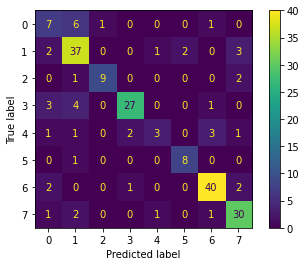

In [110]:
plot_confusion_matrix(clf, x_test, y_test)